In [1]:
import pandas as pd
import numpy as np
import numpy as np
from numpy import sqrt,mean,log,diff
import csv
import powerlaw
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.api import graphics
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
%matplotlib inline
import scipy as sp
import random as rn
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

In [2]:
df= pd.read_csv('complete.csv',na_values=True)
df.head(2)

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC_2013,SIC2018,SICcombine,...,Density,latitude,longitude,oa11cd,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID
0,AB10 1BA,2008-12-08,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,08/12/2008,82990,82990,82990,...,12.0,57.148832,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0
1,AB10 1BA,2006-06-13,Private Limited Company,Active,Private Limited Company,Active,13/06/2006,58142,58142,58142,...,12.0,57.148832,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0


In [3]:
df.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC_2013                               int64
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd  

In [4]:
#this will add column for company status in 2013 startup
df['company2013'] = np.where(df['companystatus']=='Active','Active','NotActive')

In [4]:
#this will add column for company status in 2013 startup
df['company2013'] = np.where(df['companystatus']=='Active',1,0)

In [5]:
#this will add column for company status in 2018 startup
df['company2018'] = np.where(df['CompanyStatus']=='Active',1,0)

In [7]:
df[['company2018','company2013']]

,company2018,company2013
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [8]:
df.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC_2013                               int64
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd  

In [ ]:
df['company2018'].hist()

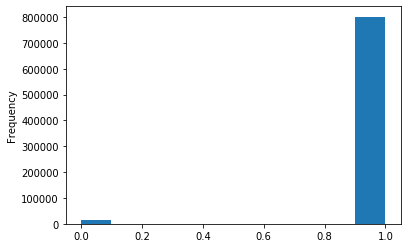

In [8]:
df['company2013'].plot.hist()

In [9]:
df['companycategory']

0         PRI/LTD BY GUAR/NSC (Private, limited by guara...
1                                   Private Limited Company
2                                   Private Limited Company
3                                   Private Limited Company
4                                   Private Limited Company
5                                   Private Limited Company
6                                   Private Limited Company
7                                   Private Limited Company
8                                   Private Limited Company
9                                   Private Limited Company
10                                  Private Limited Company
11        PRI/LTD BY GUAR/NSC (Private, limited by guara...
12                                  Private Limited Company
13                                  Private Limited Company
14                                  Private Limited Company
15                                  Private Limited Company
16        PRI/LTD BY GUAR/NSC (Private, 

In [10]:
#this will add column for company category in 2013 startup
df['companycatagory2013'] = np.where(df['companycategory']=='Private Limited Company',1,0)

In [11]:
df['companycatagory2018'] = np.where(df['CompanyCategory']=='Private Limited Company',1,0)

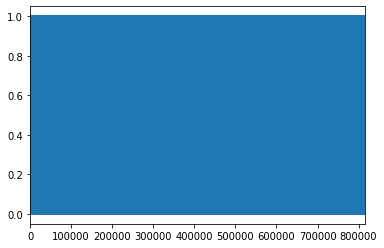

In [14]:
df['companycatagory2013'].plot()

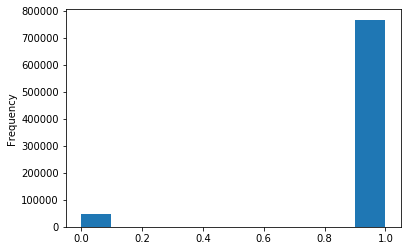

In [12]:
df['companycatagory2013'].plot.hist()

In [13]:
df['companycatagory2013']

0         0
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        0
12        1
13        1
14        1
15        1
16        0
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
815272    1
815273    1
815274    1
815275    1
815276    1
815277    1
815278    1
815279    1
815280    1
815281    1
815282    1
815283    1
815284    1
815285    1
815286    0
815287    1
815288    1
815289    1
815290    1
815291    0
815292    1
815293    1
815294    1
815295    1
815296    1
815297    1
815298    1
815299    1
815300    1
815301    1
Name: companycatagory2013, Length: 815302, dtype: int64

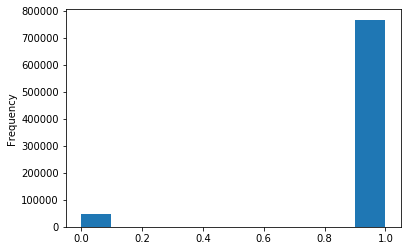

In [16]:
df['companycatagory2018'].plot.hist()

In [17]:
df.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC_2013                               int64
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd  

In [14]:
df.head(2)

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC_2013,SIC2018,SICcombine,...,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID,company2013,company2018,companycatagory2013,companycatagory2018
0,AB10 1BA,2008-12-08,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,08/12/2008,82990,82990,82990,...,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0,1,1,0,0
1,AB10 1BA,2006-06-13,Private Limited Company,Active,Private Limited Company,Active,13/06/2006,58142,58142,58142,...,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0,1,1,1,1


In [19]:
df['incorporationdate']

0         2008-12-08
1         2006-06-13
2         2005-01-19
3         1994-07-27
4         2007-10-03
5         1983-06-09
6         2010-07-12
7         2004-07-12
8         2011-09-01
9         1987-12-14
10        2003-10-20
11        1948-12-21
12        1999-08-02
13        2007-05-14
14        1990-03-15
15        1986-06-05
16        2000-03-24
17        2008-10-03
18        1997-11-04
19        1999-12-22
20        1999-09-27
21        1999-09-27
22        1999-09-27
23        1999-12-07
24        2011-11-25
25        2007-08-20
26        2009-07-15
27        2011-09-22
28        2010-12-06
29        1987-03-25
             ...    
815272    2008-05-28
815273    2002-02-06
815274    2011-08-31
815275    1997-12-19
815276    2010-11-26
815277    2012-02-03
815278    1999-12-06
815279    1999-03-11
815280    2003-11-04
815281    2008-01-08
815282    2009-12-04
815283    2004-06-04
815284    2008-07-31
815285    2010-11-12
815286    1999-03-04
815287    2007-08-02
815288    201

In [15]:
df['incorporationdate'] = pd.to_datetime(df['incorporationdate'])
df['IncorporationDate'] = pd.to_datetime(df['IncorporationDate'])
#['incorporationdate','IncorporationDate']

In [16]:
#this is for 2013 dataset
start_date_1 = '2009-01-03'
end_date_1='2013-12-29'
startup13 = (df['incorporationdate'] > start_date_1) & (df['incorporationdate'] <= end_date_1)


In [17]:
#this is for 2018 dataset
start_date = '2013-01-03'
end_date='2018-12-29'
startup18 = (df['incorporationdate'] > start_date) & (df['incorporationdate'] <= end_date)



In [18]:
startup13.shape

(815302,)

In [25]:
startup18.shape

(815302,)

In [26]:
df.shape

(815302, 31)

In [27]:
startup13.head(3)

0    False
1    False
2    False
Name: incorporationdate, dtype: bool

In [19]:
startup2013= df.loc[startup13]
startup2013

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC_2013,SIC2018,SICcombine,...,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID,company2013,company2018,companycatagory2013,companycatagory2018
6,AB10 1DQ,2010-07-12,Private Limited Company,Active,Private Limited Company,Active,2010-12-07,82990,82990,82990,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
8,AB10 1DQ,2011-09-01,Private Limited Company,Active,Private Limited Company,Active,2011-01-09,56101,56101,56101,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
24,AB10 1DQ,2011-11-25,Private Limited Company,Active,Private Limited Company,Active,2011-11-25,58290,58290,58290,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
26,AB10 1DQ,2009-07-15,Private Limited Company,Active,Private Limited Company,Active,2009-07-15,82990,82990,82990,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
27,AB10 1DQ,2011-09-22,Private Limited Company,Active,Private Limited Company,Active,2011-09-22,70100,70100,70100,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
28,AB10 1DQ,2010-12-06,Private Limited Company,Active,Private Limited Company,Active,2010-06-12,82990,82990,82990,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
38,AB10 1DQ,2009-09-15,Private Limited Company,Active,Private Limited Company,Active,2009-09-15,82990,82990,82990,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
39,AB10 1DQ,2011-05-11,Private Limited Company,Active,Private Limited Company,Active - Proposal to Strike off,2011-11-05,47990,47990,47990,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,0,1,1
45,AB10 1DQ,2010-07-16,Private Limited Company,Active,Private Limited Company,Active,2010-07-16,70100,70100,70100,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
49,AB10 1DQ,2010-09-29,Private Limited Company,Active,Private Limited Company,Active,2010-09-29,82990,82990,82990,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1


In [20]:
startup2013.shape

(198146, 31)

In [21]:
startup2013.to_csv('finalstartup13.csv',index=False)

In [22]:
startup2018= df.loc[startup18]
startup2018.shape

(64, 31)

In [23]:
startup2018.to_csv('finalstartup18.csv',index=False)

In [32]:
final=df.drop(['companycategory','companystatus',
                             'CompanyCategory','CompanyStatus',
                             'SICcombine','FID'],axis=1)

In [65]:
final.dtypes

postcode                                     object
incorporationdate                    datetime64[ns]
IncorporationDate                    datetime64[ns]
SIC_2013                                      int64
SIC2018                                       int64
population                                    int64
Males                                         int64
Females                                       int64
Lives in a household                        float64
Lives in a communal establishment           float64
Schoolchild                                 float64
Area                                        float64
Density                                       int64
latitude                                      int64
longitude                                     int64
oa11cd                                       object
lsoa11cd                                     object
msoa11cd                                     object
lsoa11nm                                     object
msoa11nm    

In [36]:
final['population_log'] = np.log(final['population']).astype('int64')
final['SIC2013_log'] = np.log(final['SIC_2013']).astype('int64')
final['SIC2018_log'] = np.log(final['SIC2018']).astype('int64')

In [64]:
final['Lives_House'] = final['Lives in a household'].astype('int64')
final['Lives_communal'] = final['Lives in a communal establishment'].astype('int64')
final['LivesSchoolchild'] = final['Schoolchild '].astype('int64')
final['AreaUK'] = final['Area '].astype('int64')
final['Density'] = final['Density'].astype('int64')
final['latitude'] = final['latitude'].astype('int64')
final['longitude'] = final['longitude'].astype('int64')

In [57]:
final['Density'].isnull().any()

True

In [58]:
final['Density'].isnull().sum().sum()

12424

In [59]:
final['Density'].fillna(0,inplace=True)

In [66]:
finalsave=final.drop(['Lives in a household','Lives in a communal establishment',
                             'Schoolchild ','Area '],axis=1)

In [67]:
finalsave.dtypes

postcode                       object
incorporationdate      datetime64[ns]
IncorporationDate      datetime64[ns]
SIC_2013                        int64
SIC2018                         int64
population                      int64
Males                           int64
Females                         int64
Density                         int64
latitude                        int64
longitude                       int64
oa11cd                         object
lsoa11cd                       object
msoa11cd                       object
lsoa11nm                       object
msoa11nm                       object
ladnm                          object
company2013                     int64
company2018                     int64
companycatagory2013             int64
companycatagory2018             int64
population_log                  int64
SIC2013_log                     int64
SIC2018_log                     int64
Lives_House                     int64
Lives_communal                  int64
Area        

In [68]:
finalsave.to_csv('final.csv',index=False)